## Nome: Samuele Pio Lipani 

In [1]:
library(tidyverse)
library(ggplot2)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Esercizio 1 
Una compagnia di pubblicazioni ha lanciato un nuovo giornale; per capire quale impatto esso abbia avuto sulla popolazione decide di estrarre randomicamente dal pubblico lettore un set di persone e somministra loro un sondaggio. Di 150 persone intervistate 29 hanno letto l'ultima edizione del giornale. 

Sia $y$ il numero di persone che hanno letto il giornale, identifichiamo con $\gamma$ il possibile outcome dello spazio degli eventi che stiamo considerando $\Omega$. 
$\gamma$ può assumere soltanto due valori $\gamma = 0,1$; essi sono mutuamente esclusivi e rappresentano l'aver letto o meno l'ultima uscita del giornale.
I due valori non hanno alcuna relazione d'ordine o metrica tra di loro e sono soltanto nominali. Poichè ci sono due valori del parametro $\gamma$ faremo riferimento a questi dati come "binomiali". 

Nella procedura di inferenza Baiesiana è necessario, dopo aver identificato la tipologia di dati da descrivere, creare un modello descrittivo con dei parametri significativi. 
Denotiamo la probabilità che una persona abbia letto il giornale con $P(\gamma=1)$. 
Un semplice modello ci permette di tracciare la $P(\gamma=1)$ direttamente attraverso un parametro $\theta$:

$$ P(\gamma=1|\theta)=\theta$$

Questa definizione richiede che $\theta$ sia un numero reale compreso tra $[0,1]$. La qualità principale di questo modello descrittivo è l'interpretazione intuitiva del parametro $\theta$: il suo valore corrisponde alla probabilità che una persona abbia letto il giornale.
Avendo già un'espressione per la probabilità che una persona abbia letto il giornale, qual è la probabilità che invece non lo abbia letto?
Intuitivamente essendo gli "outcomes" di $\gamma$ mutuamente esclusivi possiamo dedurre che $P(\gamma=0|\theta)=1-\theta$. Combinando in una singola espressione le due possibili "estrazioni" della random variable $\gamma$ troviamo:

$$ P(\gamma|\theta) = \theta^{\gamma} \cdot (1-\theta)^{1-\gamma}$$

Nei due casi limite, $\gamma=0,1$, l'equzione si riconduce alle due che abbiamo sopra descritto. E' possibile inoltre ricavare la relazione che coinvolge un set di persone $y$ e non soltanto una:

$$ P(y|\theta) = \prod_i^N P(\gamma_i|\theta) \ \ \ \text{dove $\gamma_i$ sono gli $N$ possibili outcomes}$$

$$ = \prod_i^N \theta^{\gamma_i} \cdot (1-\theta)^{1-\gamma_i} // = \theta^{\sum_i \gamma_i} \cdot (1-\theta)^{\sum_i (1-\gamma_i)}$$

$$ = \theta^{\text{# people} \ \checkmark} \cdot (1-\theta)^{\text{# people} \ \times}$$

Segue che la funzione "likelihood" ovvero la probabilità di osservare $y$ persone su $N$ che abbiano letto il giornale può essere espressa tramite la distribuzione di probabilità binomiale finzione di $\theta$.

Scegliamo un prior uniforme:

$$ P(\theta) \sim \mathrm{U}(0,1)$$

Il teorema di Bayes allora ci dice che

$$ P(\theta|y) = \frac{P(y|\theta) \cdot P(\theta)}{P(y)} $$

Il denominatore rappresenta la probabilità di osservare i dati ovvero una media di ciascuna probabilità condizionata ad un modello pesata sul modello considerato, ovvero al variare del parametro $\theta$ che descrive il modello generativo. 
Poichè il prior è costante, likelihood e posterior differiscono per una costante ovvero un fattore di scala dettato dalla normalizzazione

$$ P(y)=\int_0^1 \mathrm{d} \theta P(\theta) P(y|\theta)$$

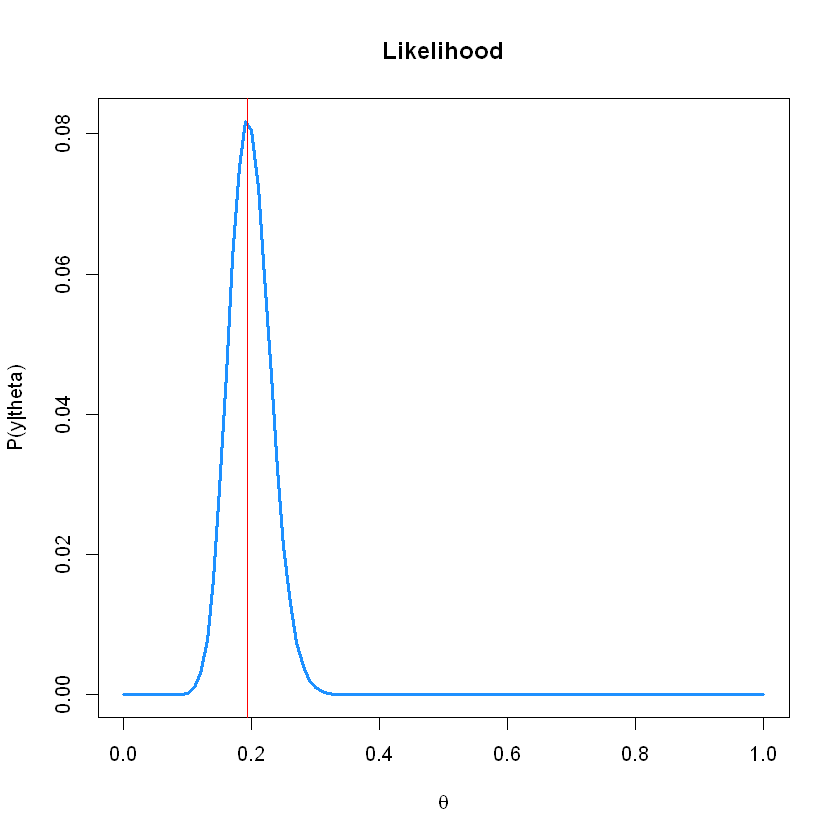

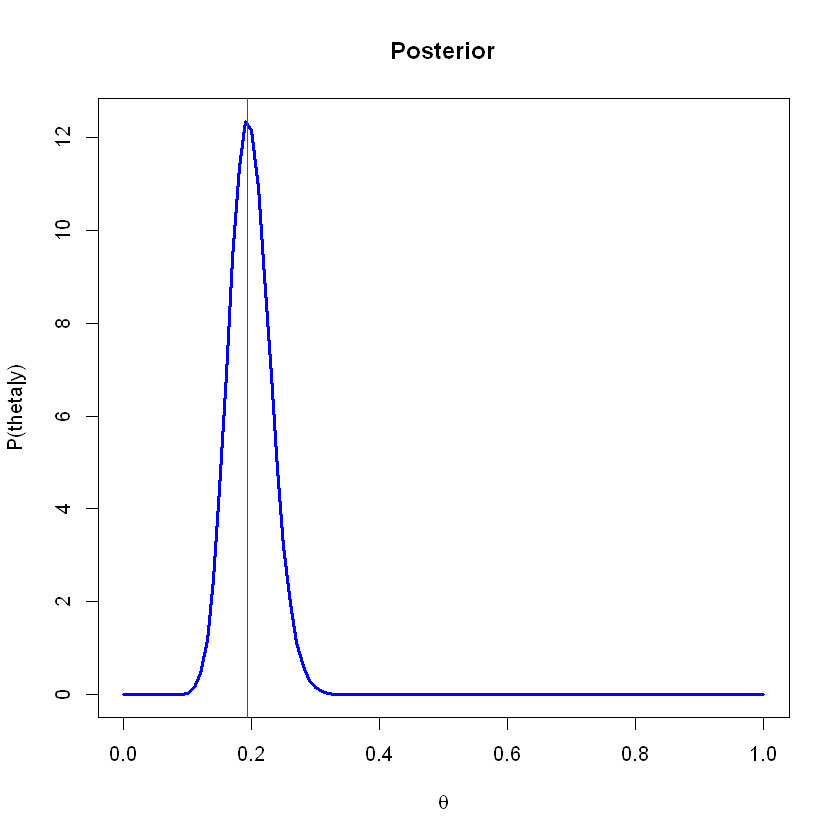

In [2]:
# procediamo alla simulazione della likelihood e del posterior 

n <- 150
y <- 29

theta <- seq(0,1, by=0.01) 
# dove 1000 è la lunghezza del vettore che sto utilizzando per la simulazione e per rappresentare le due funzioni
# esso altro non è che un vettore di probabilità alle quali verranno attribuiti pesi differenti in base alla credibilità che il processo 
# di inferenza associa a ciascuno di loro 

likelihood <- function(theta,y=29,n=150) dbinom(x = y, size = n, prob = theta)
#la scrivo come funzione di una variabile per farne l'integrale tramite integrate che accetta unidimensional functions

posterior <- function(theta) likelihood(theta)/integrate(likelihood, lower = 0, upper = 1)$value

plot(theta, likelihood(theta), col="dodgerblue", type="l", lwd=3, xlab=expression(theta), ylab="P(y|theta)", main="Likelihood")
abline(v = 29/150, col = "red")
plot(theta, posterior(theta), col="blue", type="l", lwd=3, xlab=expression(theta), ylab="P(theta|y)", main="Posterior") 
abline(v = 29/150, col = "red")

Si nota che la moda, ovvero il valore in cui la distrbuzione è massima, vale in entrambi i casi $29/150$ in quanto con un prior uniforme la probabilità di osservare 29 persone su 150 che leggono il giornale calcolata tramite la definizione frequentista è il modello a cui viene affidata dall'inferenza Bayesiana la maggiore credibilità.

## Esercizio 2
Tre studenti vogliono costruire la loro prior distribution riguardo la frazione di residenti che supportano la costruzione di una nuova sala concerti nella loro piccola cittadina. 
Utilizzando esattamente lo stesso formalismo dell'esercizio precedente le tre funzioni $P(\theta)$ in questo caso valgono:

$$ P(\theta) = \mathrm{B}(\alpha,\beta) $$
$$ P(\theta) = \mathrm{U}(0,1)$$


$$ P(\theta) =  \left\{ \begin{array} \ 20x \quad 0 \leq x < 0.1 \\ 2  \quad 0.1 \leq x < 0.3 \\ 5-10x \quad 0.3 \leq x < 0.5 \\ 0 \quad x \geq 0.5 \end{array} \right.
$$

Bisogna fare attenzione alla forma della distribuzione beta di cui conosciamo il valore atteso e la deviazione standard. Reparametrizziamo la distribuzione beta passando da $\alpha,\beta$ a $\mu,\text{var}$ 

$$ \alpha = \mu \left(\frac{\mu(1-\mu)}{\text{var}}-1\right), \text{ se } \text{var}< \mu(1-\mu)$$
$$ \beta = (1 - \mu)\left(\frac{\mu(1-\mu)}{\text{var}}-1\right), \text{ se }\text{var}< \mu(1-\mu) $$

In [3]:
# verifichiamo che la reparametrizzazione della distribuzione beta sia possibile 
print(paste("var =",0.08^2))
print(paste("mu*(1-mu) =", (0.2*(1-0.2))))
print(paste("var < mu*(1-mu) =", 0.08^2 < 0.2*(1-0.2)))

[1] "var = 0.0064"
[1] "mu*(1-mu) = 0.16"
[1] "var < mu*(1-mu) = TRUE"


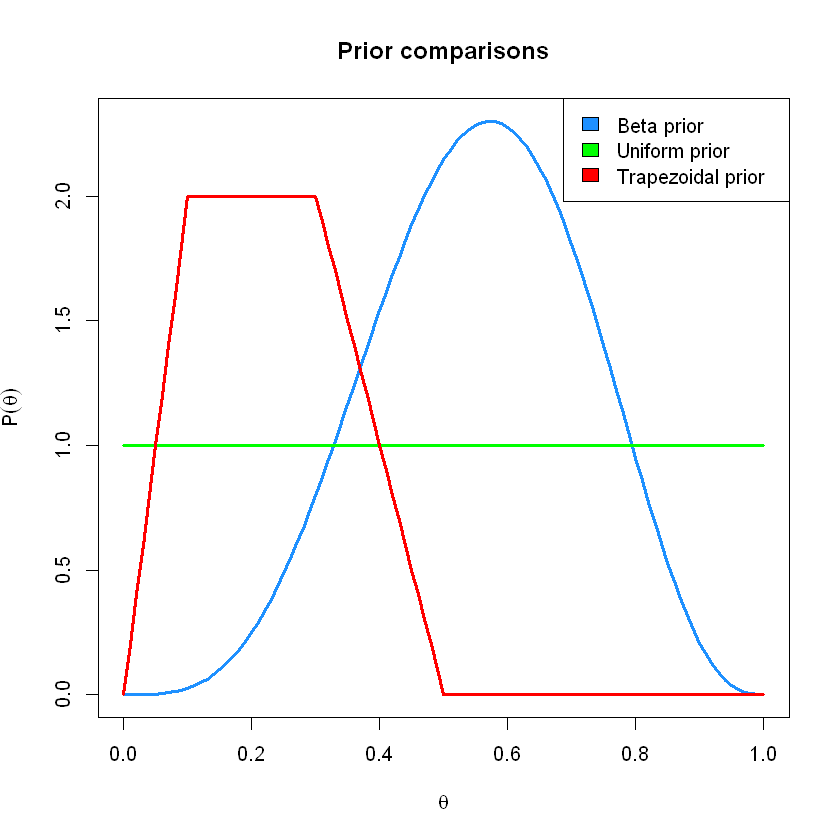

In [4]:
# rappresentiamo i tre priors 

mu <- 0.2
std <- 0.08

alpha <- mu*(mu*(1-mu)/std^2-1)
beta <- (1-mu)*mu*(mu*(1-mu)/std^2-1)

betaprior <- function(theta) dbeta(theta,shape1=alpha,shape2=beta)
uniprior <-  function(theta) rep(1,length = length(theta))
trapezprior <- function(x){
    y <- ifelse(x < 0.1, 20*x, ifelse(x < 0.3, 2, ifelse(x < 0.5, 5-10*x, 0)))
    return(y)
}

# rappresentiamoli nello stesso plot 

plot(theta, betaprior(theta), type="l", col="dodgerblue", main="Prior comparisons", lwd=3, xlab=expression(theta), ylab=expression(P(theta)))
lines(theta, uniprior(theta), col="green", lwd=3)
lines(theta, trapezprior(theta), lwd=3, col="red")
legend("topright", legend = c("Beta prior","Uniform prior", "Trapezoidal prior") , col=c("dodgerblue","green","red"), fill=c("dodgerblue","green","red"))

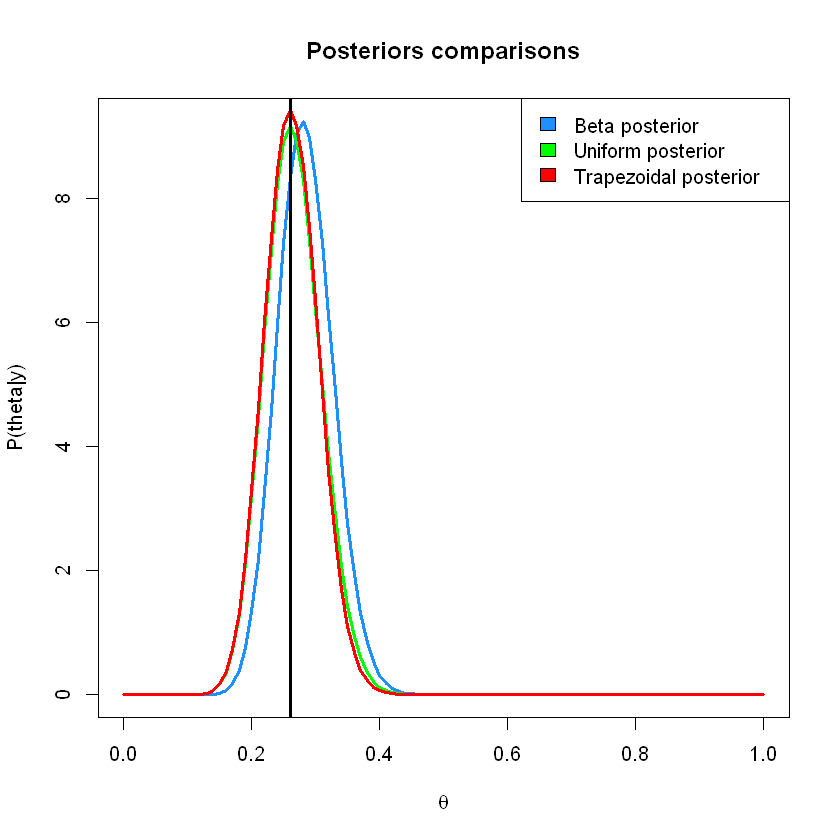

In [5]:
# per dare una stima del valore più probabile e il 95% credibility interval innanzitutto procediamo con il passo di inferenza Baiesiana
# calcoliamo in generale il posterior al variare di prior e likelihood 

posterior <- function(x,prior,likelihood){
    num <- function(x) likelihood(x)*prior(x)
    p <- (num(x))/integrate(num, lower = 0, upper = 1)$value
    return(p)
}

#posterior <- function(prior,likelihood){
    #p <- (likelihood(theta)*prior(theta))/integrate(likelihood, lower = 0, upper = 1)$value
#}
# attenzione che essendomi servito di argomenti che sono funzioni quando le chiamo all'interno della funzione più esterna devo utilizzare 
# come loro argomenti non dei parametri generici ma quelli con cui le voglio valutare davvero, in questo caso theta. 
# Oppure posso direttamente inserire come parametro della funzione posterior anche x argomento delle funzioni prior e likelihood

binlikelihood <- function(theta,y=26,n=100) dbinom(x = y, size = n, prob = theta)

# assegno per semplicità a dei vettori i tre posteriors
beta.posterior <- posterior(theta,betaprior,binlikelihood)
uni.posterior <- posterior(theta,uniprior,binlikelihood)
trap.posterior <- posterior(theta,trapezprior,binlikelihood)

# rappresento nello stesso grafico 
plot(theta, beta.posterior, col="dodgerblue", type="l", lwd=3, xlab=expression(theta), ylab="P(theta|y)", main="Posteriors comparisons")
lines(theta, uni.posterior, col="green", lwd=3)
lines(theta, trap.posterior, lwd=3, col="red")
abline(v = (26/100), col = "black", lwd=3)
legend("topright", legend = c("Beta posterior","Uniform posterior", "Trapezoidal posterior") , col=c("dodgerblue","green","red"), fill=c("dodgerblue","green","red"))

### MAP Maximum a posteriori
Per dare una stima dei valori più probabili cerchiamo il massimo delle funzioni posteriors rispetto al parametro $\theta$ ottenute nella cella precedente.

In [114]:
# MAP 
map <- function(theta,posterior) theta[posterior==max(posterior)]

map.beta <- map(theta,beta.posterior)
map.uni <- map(theta,uni.posterior)
map.trap <- map(theta,trap.posterior)


plot(theta, beta.posterior, col="dodgerblue", type="l", lwd=3, xlab=expression(theta), ylab="P(theta|y)", main="Posteriors comparisons")
lines(theta, uni.posterior, col="green", lwd=3)
lines(theta, trap.posterior, lwd=3, col="red")
abline(v = (26/100), col = "black", lwd=3)
abline(v = map.beta, col = "lightblue", lwd=3)
abline(v = map.uni, col = "purple", lwd=3)
abline(v = map.trap, col = "violet", lwd=3)
legend("topright", legend = c(sprintf("Binomial mode=%.2f",0.26),sprintf("Beta MAP=%.2f", map.beta),
                              sprintf("Uniform MAP=%.2f",map.uni), sprintf("Trapezoidal MAP=%.2f",map.trap)) , 
       col=c("black","lightblue","purple","violet"), 
       fill=c("black","lightblue","purple","violet"))

ERROR: Error in max(posterior): invalid 'type' (closure) of argument


### Intervalli di massima credibilità 95%
Per calcolare l'intervallo di credibilità per le tre posteriors noto che le tre distribuzioni sono simmetriche rispetto alla loro moda. Pertanto per calcolare quell'intervallo in cui l'area sottesa alla distribuzione corrisponde a 0.95 mi basterà assegnare 0.025 all'area delle due code. Lo scopo è dunque trovare

$$ x  : \int_{-\infty}^{x} P(\theta|y) = 0.025 $$

Analogamente per il secondo estremo dell'intervallo.

[1] "beta prior: integral tra  0.195 e 0.365 = 0.951393256214573"
[1] "uniform prior: integral tra  0.174 e 0.346 = 0.951110245265033"
[1] "trapezoidal prior: integral tra  0.178 e 0.342 = 0.952036888867533"


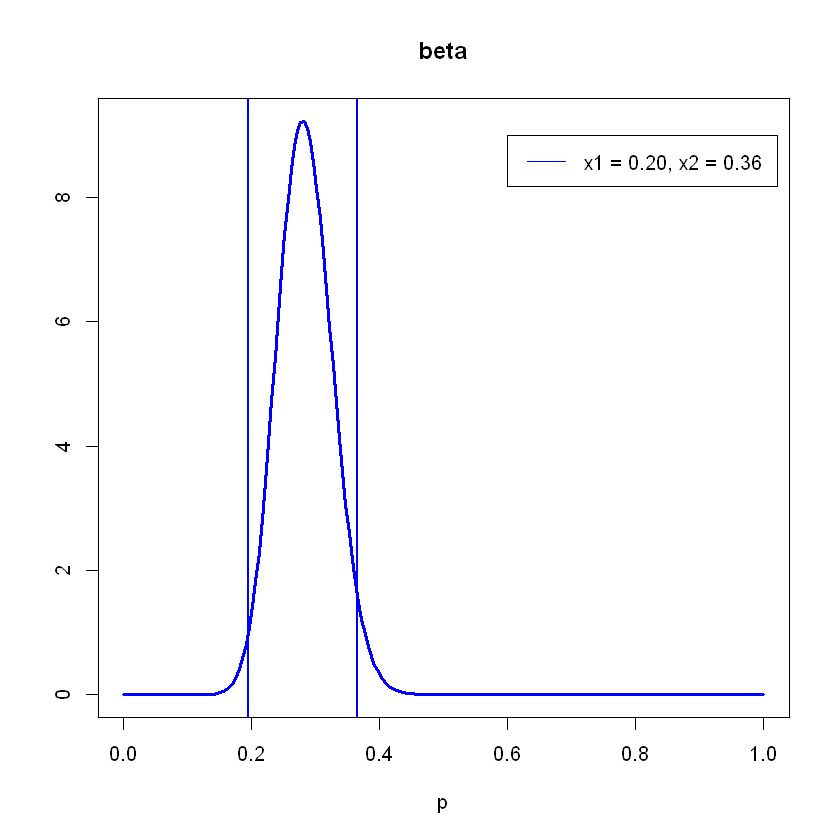

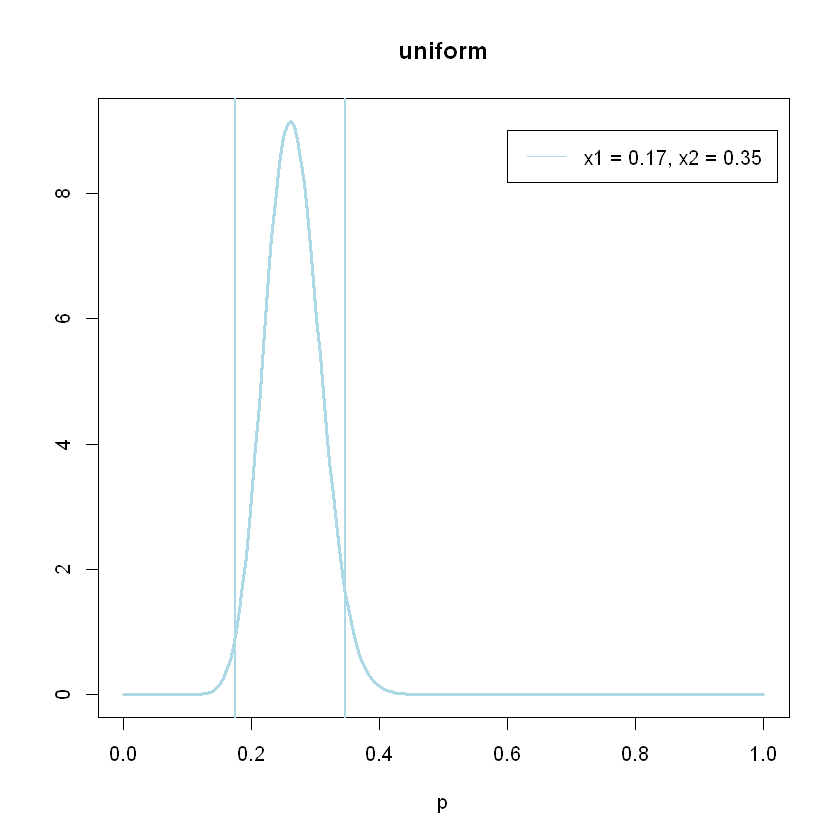

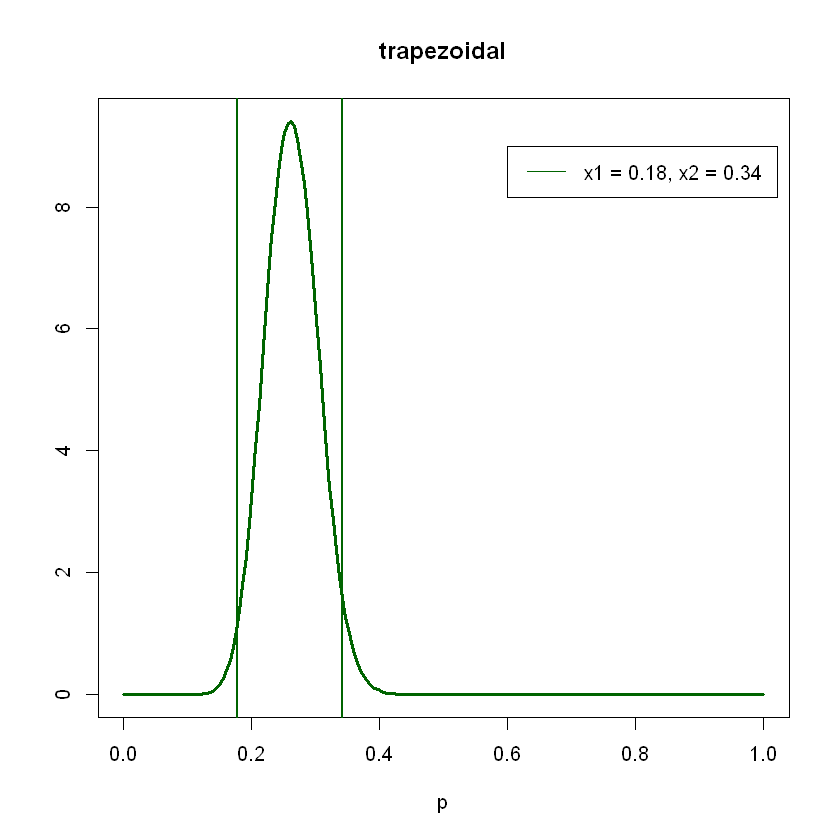

In [7]:
# innanzitutto rendo i posterior funzioni unicamente di una variabile per poterli integrare nell'intervallo di credibilità tramite integrate
posterior.beta.prior <- function(theta) posterior(theta,betaprior,binlikelihood)
posterior.uniform.prior <- function(theta) posterior(theta,uniprior,binlikelihood)
posterior.trapezoidal.prior <- function(theta) posterior(theta,trapezprior,binlikelihood)

# dai tre grafici della cella precedente trovo "a mano" gli estremi dei tre intervalli 

x1.95.beta <- map.beta - 0.085; x2.95.beta <- map.beta + 0.085
print(paste("beta prior: integral tra ", x1.95.beta, "e", x2.95.beta, "=", integrate(posterior.beta.prior, x1.95.beta, x2.95.beta)$value))

x1.95.uniform <- map.uni - 0.086; x2.95.uniform <- map.uni + 0.086
print(paste("uniform prior: integral tra ", x1.95.uniform, "e", x2.95.uniform, "=", integrate(posterior.uniform.prior, x1.95.uniform, x2.95.uniform)$value))

x1.95.trapezoidal <- map.trap - 0.082; x2.95.trapezoidal <- map.trap + 0.082
print(paste("trapezoidal prior: integral tra ", x1.95.trapezoidal, "e", x2.95.trapezoidal, "=", integrate(posterior.trapezoidal.prior, x1.95.trapezoidal, x2.95.trapezoidal)$value))

posteriors.list <- list(posterior.beta.prior, posterior.uniform.prior, posterior.trapezoidal.prior)
colors.vec     <- c("blue","lightblue","darkgreen")
names.vec      <- c("beta","uniform","trapezoidal")
x1.vec         <- c(x1.95.beta, x1.95.uniform, x1.95.trapezoidal)
x2.vec         <- c(x2.95.beta, x2.95.uniform, x2.95.trapezoidal)

p.vector <- seq(0, 1, length.out = 200)
for (i in 1:3) {
    plot(p.vector, posteriors.list[[i]](p.vector), col = colors.vec[i], type = "l", xlab = "p", ylab = "", main = names.vec[i], lwd = 2.5)
    abline(v = x1.vec[i], col = colors.vec[i], lwd = 2); abline(v = x2.vec[i], col = colors.vec[i], lwd = 2)
    legend(legend = sprintf("x1 = %.2f, x2 = %.2f", x1.vec[i], x2.vec[i]), x = 0.6, y = 9, col = colors.vec[i], lty = 1)
}

## Esercizio 3
Una moneta viene lanciata 30 volte restituendo 15 volte testa e 15 volte croce. Stimare il posterior dopo questi trenta lanci sulla frazione di teste rispetto al totale corrisponde a mettere insieme i due esercizi visti fino ad ora. Partendo da una binomial likelihood ad ogni lancio, oppure direttamente considerando una situazione analoga al primo esercizio, la nostra incertezza iniziale, prior $P(\theta)$, viene distribuita intorno all probabilità più credibile che esca testa contro croce nel lancio di una moneta. Il procedimento di aggiornamento della credibilità corrisponde a quello di inferenza Baiesiana messo in atto già nel primo esercizio.

- se il prior è uniforme il posterior è uguale alla likelihood a meno di un fattore di scala ovvero la normalizzazione rispetto al parametro del modello $\theta$ 
- se il prior è una distribuzione beta invece si riconosce che esso è un conjugate prior della likelihood binomiale; questa proprietà permette di aggiornare il prior senza calcolo di integrali ma unicamente cambiando ad ogni iterazione il valore di $\alpha$ e $\beta$. Così facendo il posterior risultante appartiene ancora alla famiglia delle distribuzioni beta ma con i due parametri rinnovati!


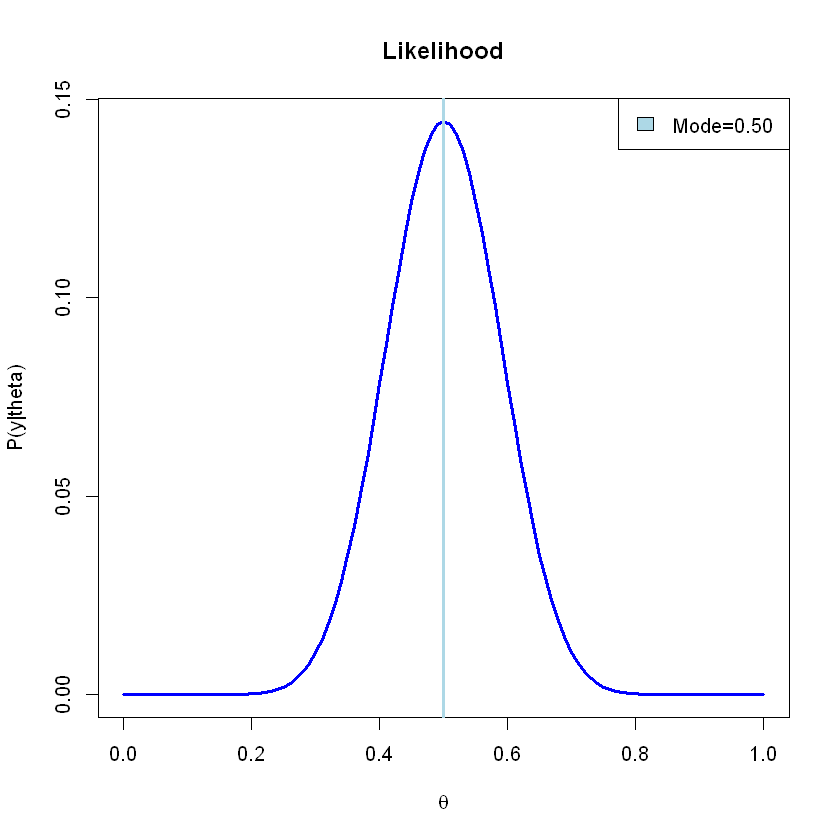

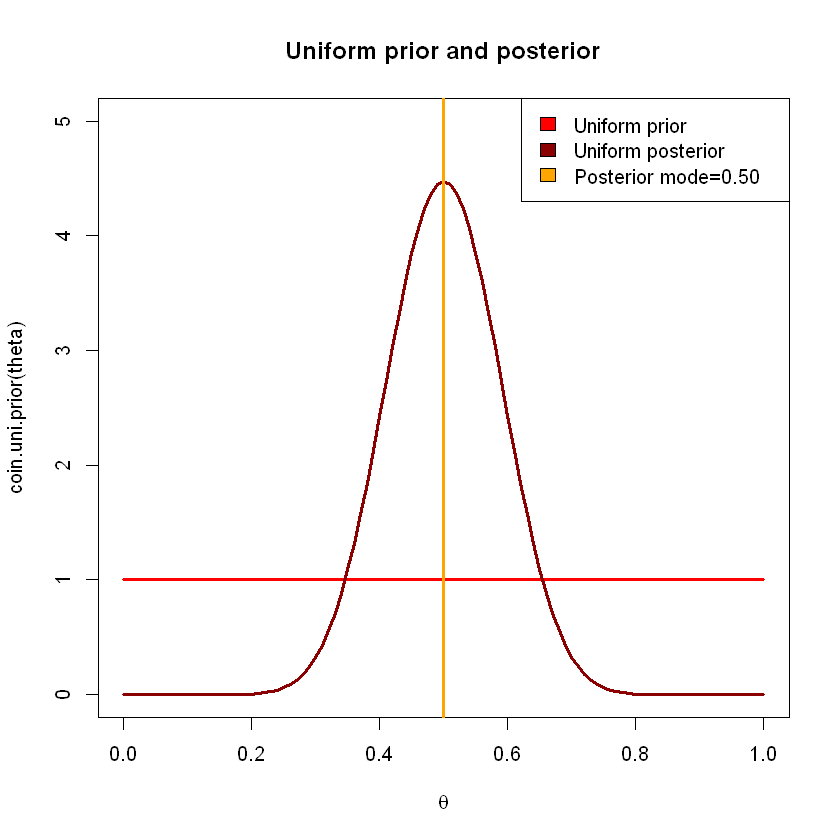

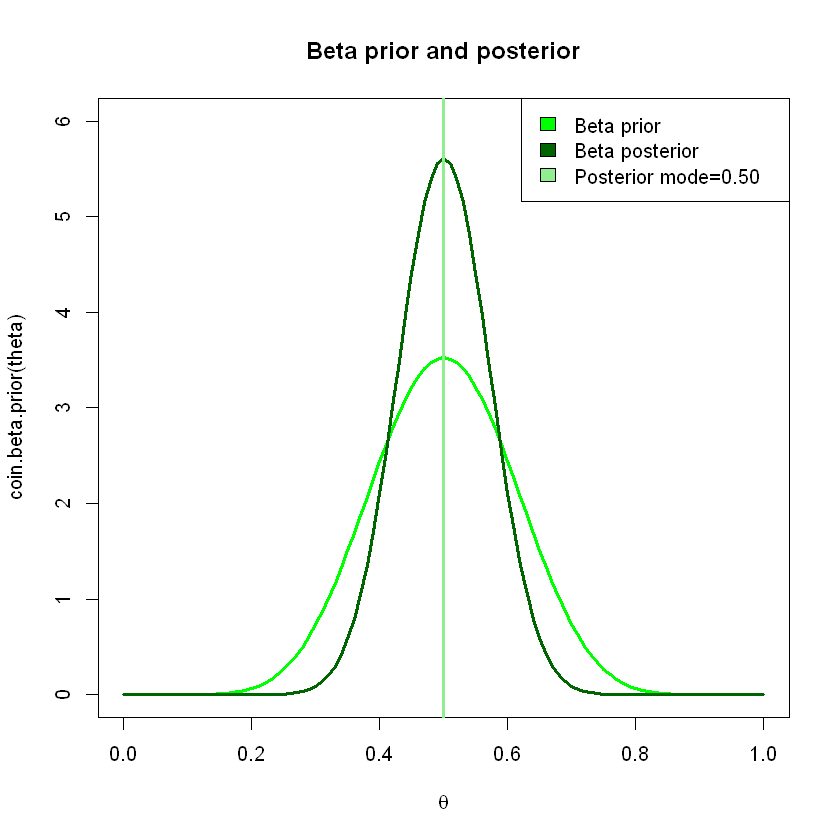

In [10]:
n.attempts <- 30
n.heads <- 15
alpha <- 10; beta <- alpha 

# definisco le funzioni prior e likelihood utili per poi calcolare il posterior
coin.likelihood <- function(theta, y=n.heads, n=n.attempts) dbinom(x = y, size = n, prob = theta)
coin.uni.prior <- function(theta) rep(1,length=length(theta))
coin.beta.prior <- function(theta) dbeta(theta, shape1 = alpha, shape2 = beta)
# scelgo come parametri del beta prior alpha e beta uguali a 10 tali che il punto di partenza sia una distribuzione piccata in 0.5 ovvero un 
# fair coin 

# per calcolare il posterior non abbiamo bisogno della funzione definita nell'esercizio uno ma sfruttiamo:
# - per il prior uniforme il fatto che il posterior sarà la likelihood normalizzata rispetto al modello
# - per il beta prior invece la proprietà di essere conjugate prior della likelihood binomiale
uniform.posterior <- function(theta) coin.likelihood(theta)/integrate(coin.likelihood, 0, 1)$value
beta.posterior <- function(theta) dbeta(theta, shape1 = (alpha + n.heads), shape2 = (beta + (n.attempts - n.heads)))

# rappresento la likelihood binomiale 
plot(theta, coin.likelihood(theta), col="blue", main="Likelihood", xlab=expression(theta), ylab="P(y|theta)", type="l", lwd=3)
abline(v = map(theta,coin.likelihood(theta)), col = "lightblue", lwd=3)
legend("topright", legend=sprintf("Mode=%.2f",map(theta,coin.likelihood(theta))), col="lightblue", fill="lightblue")

# adesso prior e posterior per uniform
plot(theta, coin.uni.prior(theta), col="red", main="Uniform prior and posterior", xlab=expression(theta), type="l", lwd=3, ylim=c(0,5))
lines(theta, uniform.posterior(theta), col="darkred", xlab=expression(theta), type="l", lwd=3)
abline(v = map(theta, uniform.posterior(theta)), col="orange", lwd=3)
legend("topright", legend = c("Uniform prior", "Uniform posterior", sprintf("Posterior mode=%.2f",map(theta, uniform.posterior(theta)))) , col=c("red","darkred","orange"), fill=c("red","darkred","orange"))

# e per beta 
plot(theta, coin.beta.prior(theta), col="green", main="Beta prior and posterior", xlab=expression(theta), type="l", lwd=3, ylim=c(0,6))
lines(theta, beta.posterior(theta), col="darkgreen", xlab=expression(theta), type="l", lwd=3)
abline(v = map(theta, beta.posterior(theta)), col="lightgreen", lwd=3)
legend("topright", legend = c("Beta prior", "Beta posterior", sprintf("Posterior mode=%.2f",map(theta, beta.posterior(theta)))) , col=c("green","darkgreen","lightgreen"), fill=c("green","darkgreen","lightgreen"))


### Intervalli di massima credibilità 95%
Se ci trovassimo in prossimità della moda potremmo usare un'approssimazione gaussiana per determinare gli estremi dell'intervallo a,b tali che $\int_a^b \mathrm{d} \theta P(\theta|y) = \text{valore desiderato}$. 
Ad esempio abbiamo ricavato la relazione generale per cui:

$$a,b = m \pm 2\sigma \ \ \ \text{con} \ m \ \text{moda del posterior e} \ \ \sigma = \sqrt{-\frac{d^2 \log \text{posterior}}{d\theta^2}\Bigr|_{\substack{\theta = m}}}$$ 

Sviluppando in dettaglio la relazione precedente otteniamo:

$$\sigma = \frac{1}{\alpha + \beta + n - 2}\sqrt{\frac{\alpha + r - 1}{\alpha + r}}$$

Dove n è il numero di lanci della moneta mentre r il numero di volte in cui è uscita testa.


Tuttavia allontanandoci dalla moda del posterior l'approssimazione non è più valida pertanto ricorriamo allo stesso procedimento dell'esercizio precedente per stimare gli estremi dell'intervallo di massima crediiblità al 95%.

0.9599948 with absolute error < 9.1e-13

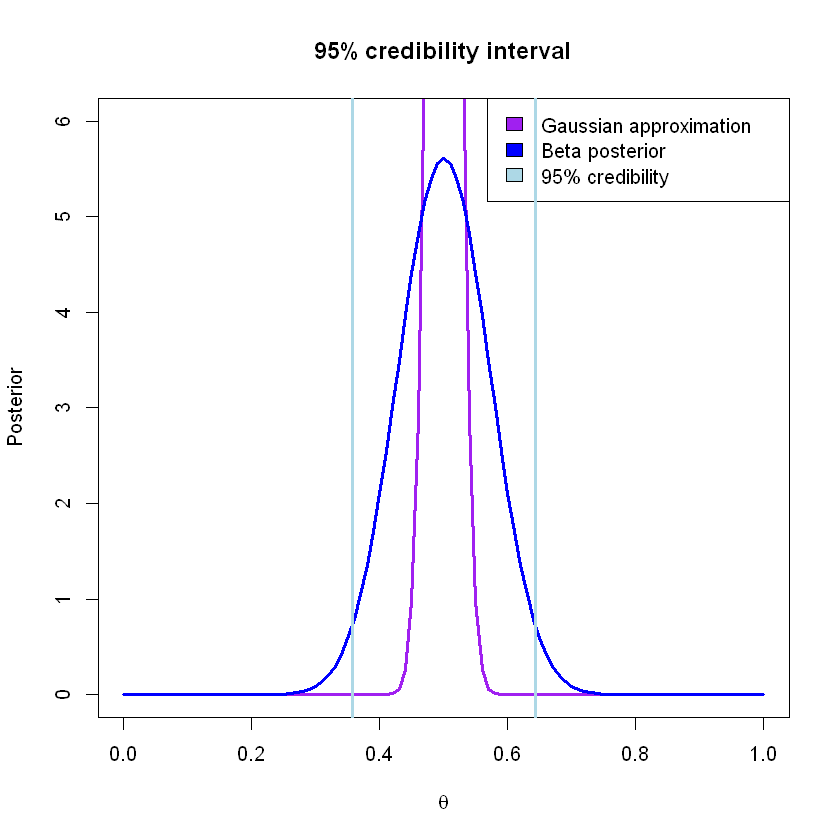

In [36]:
# per prima cosa vediamo nel caso di beta posterior come applicare l'approssimazione vista sopra

compute.beta.sigma <- function(a=alpha,b=beta,n=n.attempts,r=n.heads) (1/(a+b+n-2))*sqrt((a+r-1)/(a+r))
# utilizzo come valori di default quelli iniziali ma posso anche cambiarli 

err <- compute.beta.sigma()
integrate(beta.posterior,0.5-7*err,0.5+7*err)
#scegliendo come costante di proporzionalità k = 7 per rientrare dentro il 95 percento di credibilità

plot(theta, dnorm(theta, mean = 0.5, sd = err), type="l", lwd=3, col="purple", ylim=c(0,6), main="95% credibility interval", 
     xlab=expression(theta), ylab="Posterior")
lines(theta, beta.posterior(theta), type="l", lwd=3, col="blue")
legend("topright", legend=c("Gaussian approximation", "Beta posterior","95% credibility"), col=c("purple","blue","lightblue"),
       fill=c("purple","blue","lightblue"))
abline(v = 0.5-7*err, col="lightblue", lwd=3)
abline(v = 0.5+7*err, col="lightblue", lwd=3)

#### Come si osserva dal plot l'approssimazione gaussiana non è abbastanza coerente per rappresentare l'intervallo di credibilità dei posterior (in questo caso il beta) che abbiamo ricavato. 

[1] "integrale tra  0.36 e 0.64 = 0.955615155284447"


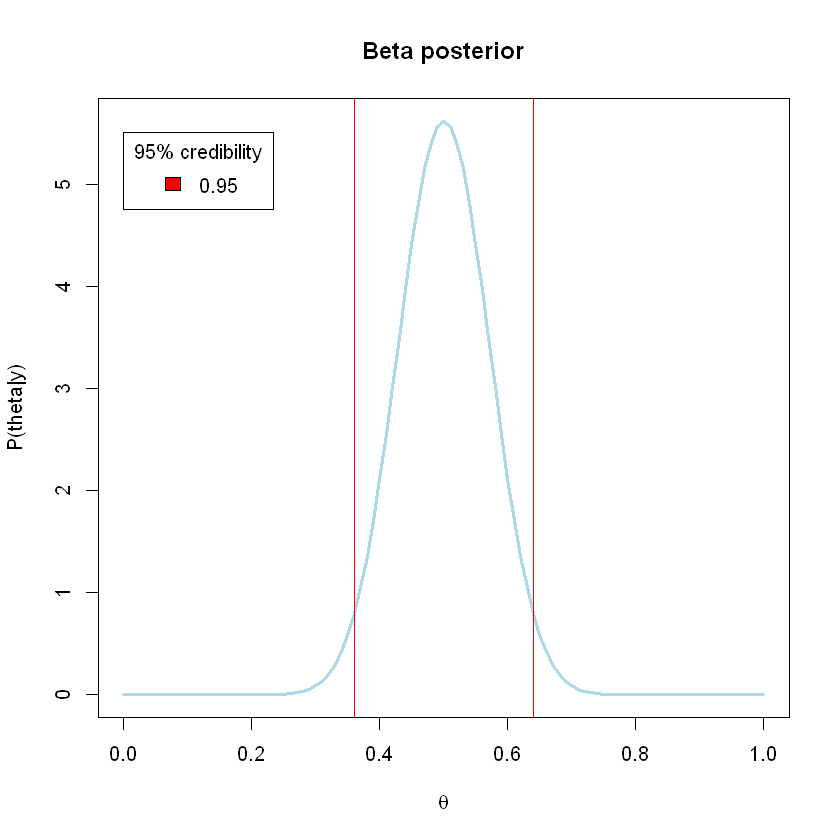

In [44]:
x1.95 <- 0.36; x2.95 <- 0.64
print(paste("integrale tra ", x1.95, "e", x2.95, "=", integrate(beta.posterior, x1.95, x2.95)$value))

plot(theta, beta.posterior(theta), col="lightblue", main="Beta posterior",lwd=3,type="l", xlab=expression(theta),ylab="P(theta|y)")
abline(v = x1.95, col = "red"); abline(v = x2.95, col = "red")

legend(x = 0, y = 5.5, legend = "0.95", col = "red", fill="red", 
        title = "95% credibility")

### Analisi sequenziale dei lanci della moneta
Il paradigma da sfruttare è quello utilizzato nell'esericizio del six boxes toy experiment. Ovvero ad ogni estrazione, che essa sia immessa da input oppure letta da un vettore, faccio l'update del posterior. 

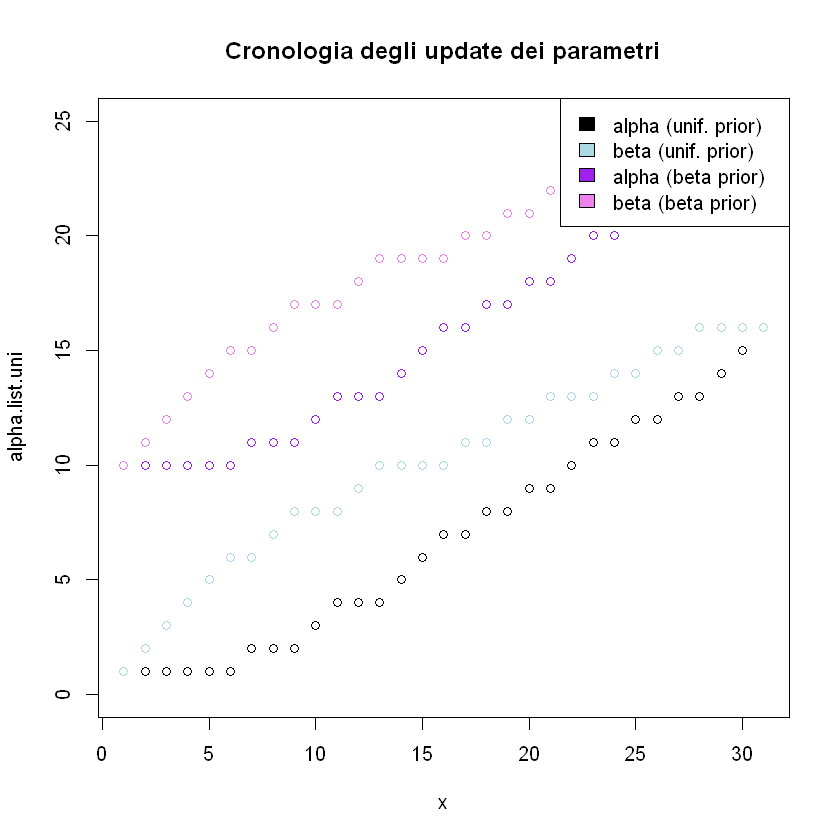

In [88]:
# partiamo dal vettore di lanci della moneta 

chr.coin.tosses <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H",
           "T", "H", "T", "H", "H", "H")
from.chr.to.num <- function(vector){
    vector[vector=="H"]=1
    vector[vector!=1]=0
    # per convenzione ho scelto gamma = 1 testa mentre gamma = 0 croce 
    return(as.numeric(vector))
}

coin.tosses <- from.chr.to.num(chr.coin.tosses)
number.heads <- sum(coin.tosses)
number.tosses <- length(coin.tosses)
# dopo aver definito le variabili principali del problema (nuovamente per questa sezione per maggiore leggibilità) osservo che 
# in questo caso l'unica funzione di cui ho bisogno è quella che ad ogni iterazione modifica il valore di alpha e beta e li memorizza in una 
# lista. Questo accade perchè anche il prior uniforme è un beta prior ma con alpha,beta=1. 

seq.posterior <- function(theta,alpha,beta,n.attempts,n.heads) dbeta(theta, shape1 = (alpha + n.heads), shape2 = (beta + (n.attempts - n.heads)))
# ad ogni iterazione cambiano tutti i parametri della funzione seq.posterior tranne theta in quanto la distribuzione beta viene 
# aggiornata e una nuova estrazione è stata effettuata, incrementando eventualmente anche n.heads oppure soltanto il numero di estrazioni

alpha.list.uni <- c(1); beta.list.uni <- c(1); alpha.list.beta <- c(10); beta.list.beta <- c(10) 
# sono i quattro punti di partenza per i due prior 
mode.list.uni <- c(0.5); mode.list.beta <- c(0.5)
# la lista in cui memorizzeremo anche la moda per rappresentarla ad ogni iterazione

for(i in 1:number.tosses){
    head <- coin.tosses[i] # puà essere testa cioè uno oppure croce, zero. Quando esce croce significa che sommo o sottraggo zero
    alpha.list.uni[i+1] <- alpha.list.uni[i] + head
    beta.list.uni[i+1] <- beta.list.uni[i] + 1 - head # poichè ad ogni iterazione il numero di estrazioni aumenta di uno
    alpha.list.beta[i+1] <- alpha.list.beta[i] + head
    beta.list.beta[i+1] <- beta.list.beta[i] + 1 - head
}

x <- 1:(number.tosses + 1)
ymax <- max(c(alpha.list.uni, alpha.list.beta, beta.list.uni, beta.list.beta))

plot(x, alpha.list.uni, col = "black", ylim = c(0, ymax)); points(x, beta.list.uni, col = "lightblue") 
points(x, alpha.list.beta, col = "purple"); points(x, beta.list.beta, col = "violet") 
legend("topright",legend = c("alpha (unif. prior)", "beta (unif. prior)", "alpha (beta prior)", "beta (beta prior)"), 
       col=c("black","lightblue","purple","violet"), 
       fill=c("black","lightblue","purple","violet"))
title(main = "Cronologia degli update dei parametri")

Notiamo che aumentando il valore dei due parametri il posterior si fa sempre più piccato intorno al valore di probabilità di osservare testa a cui è allocata la maggiore credibilità

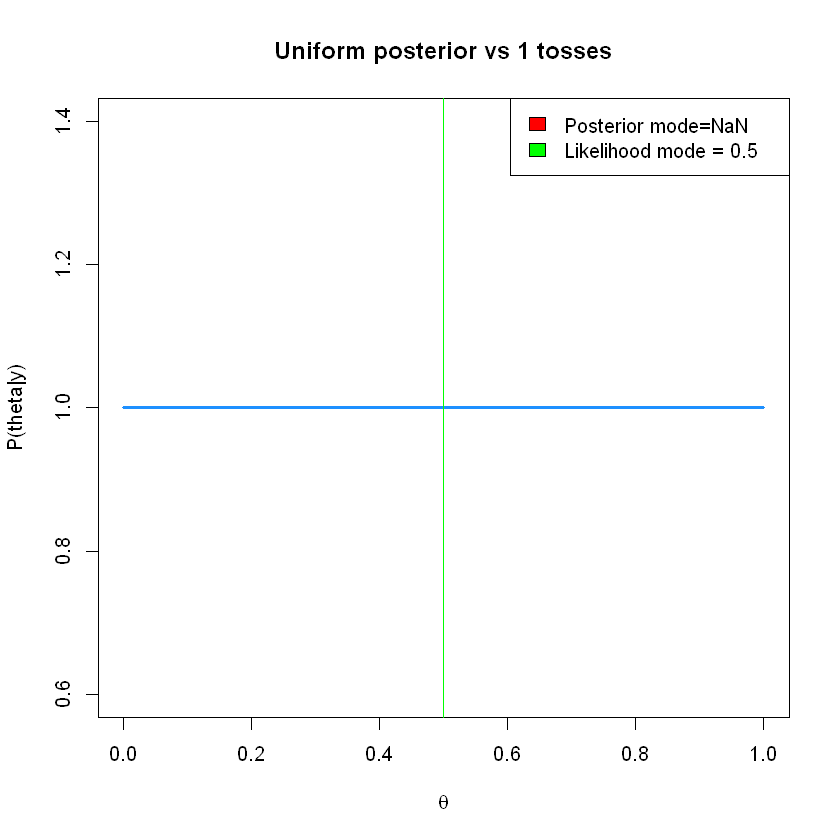

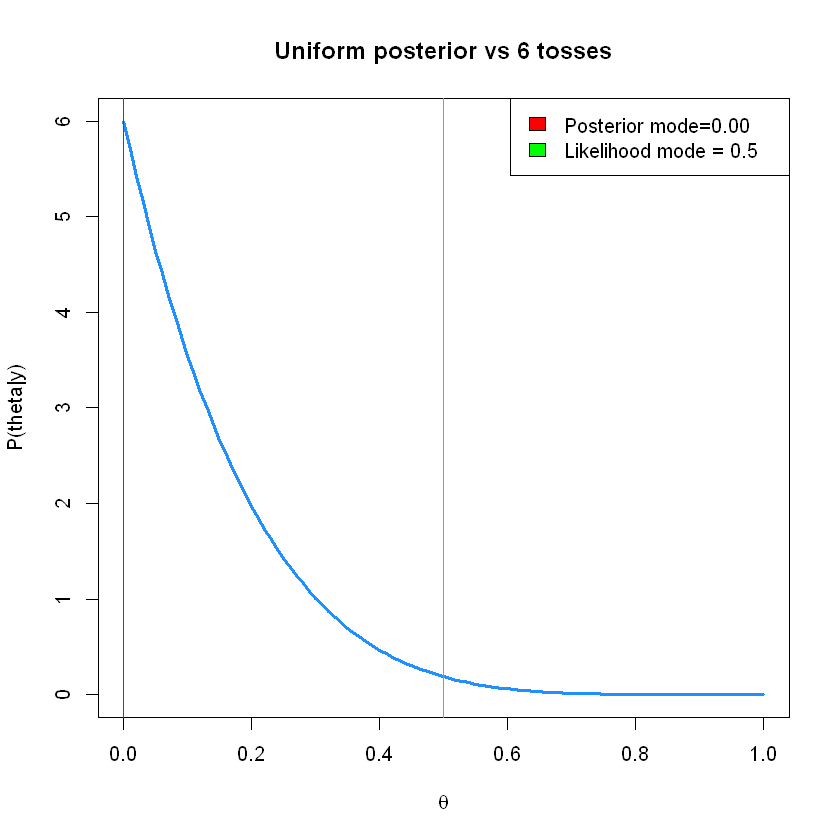

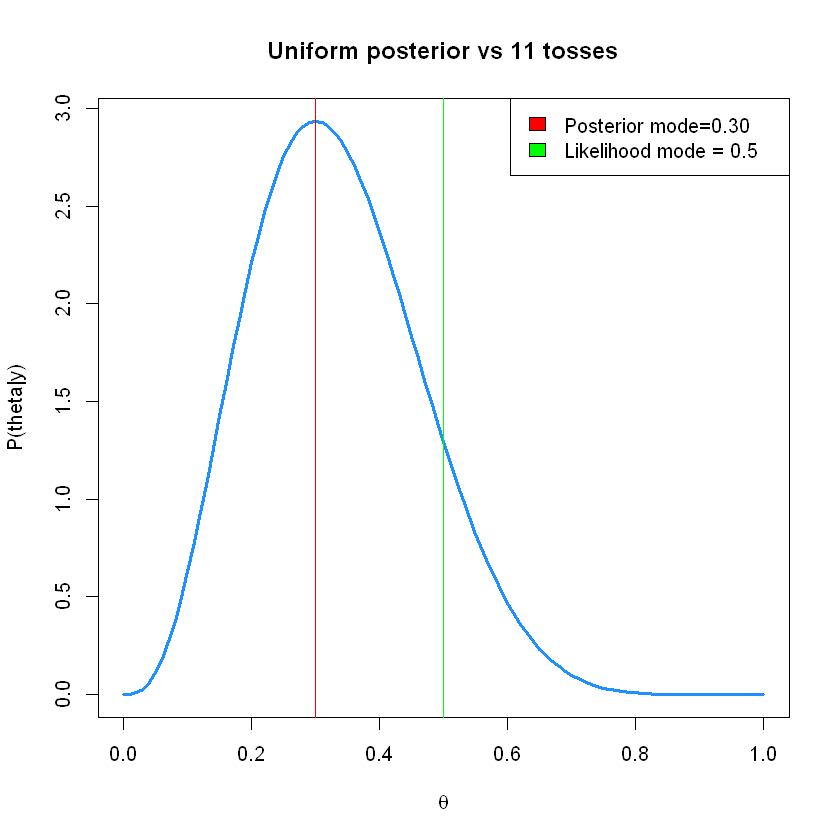

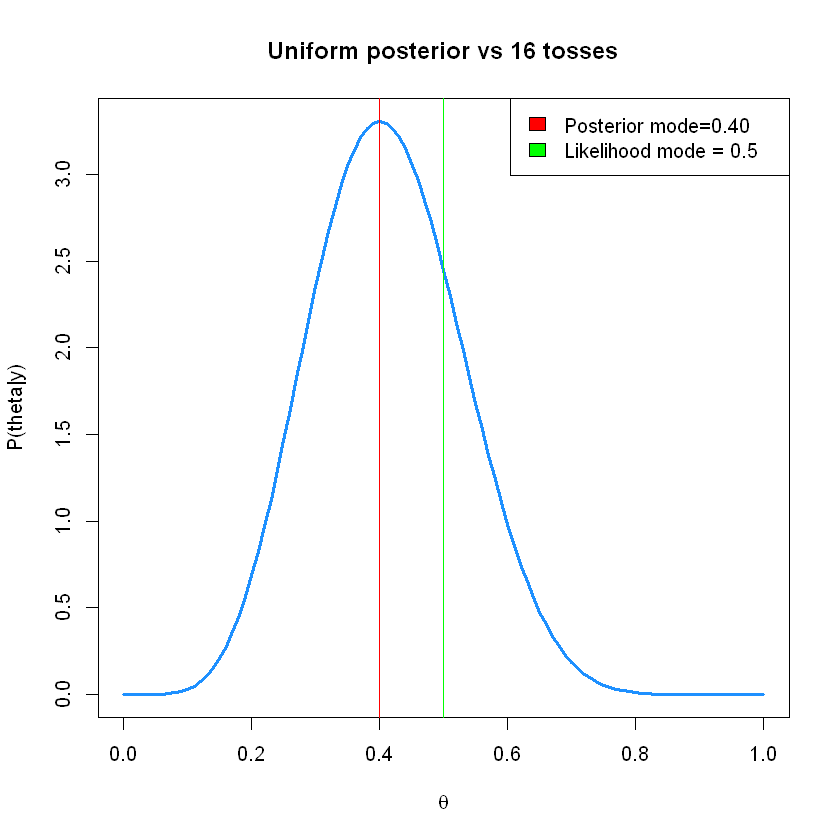

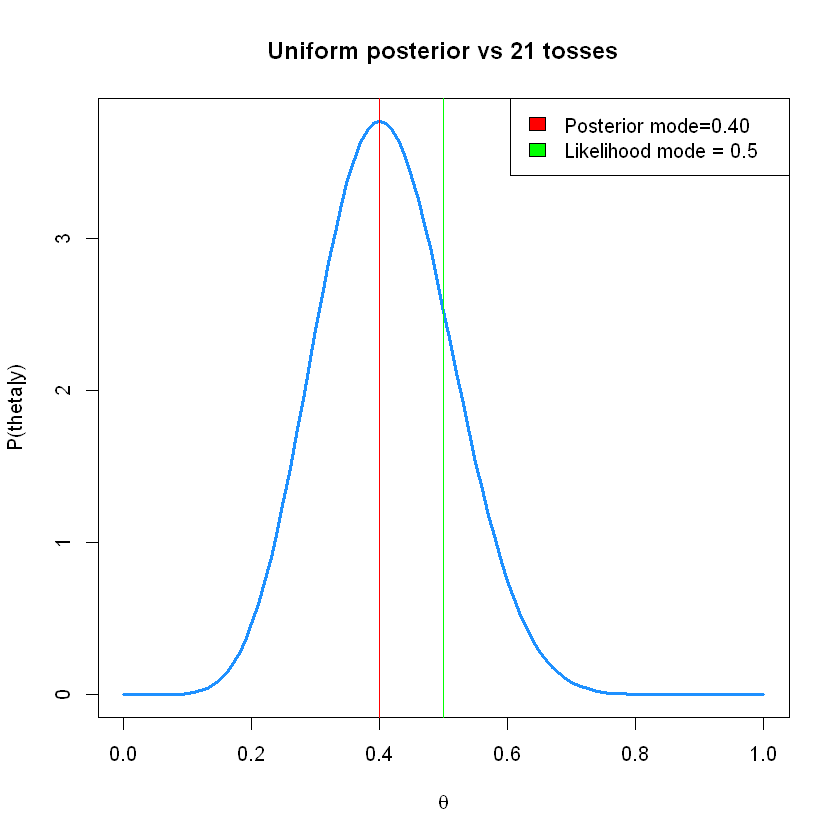

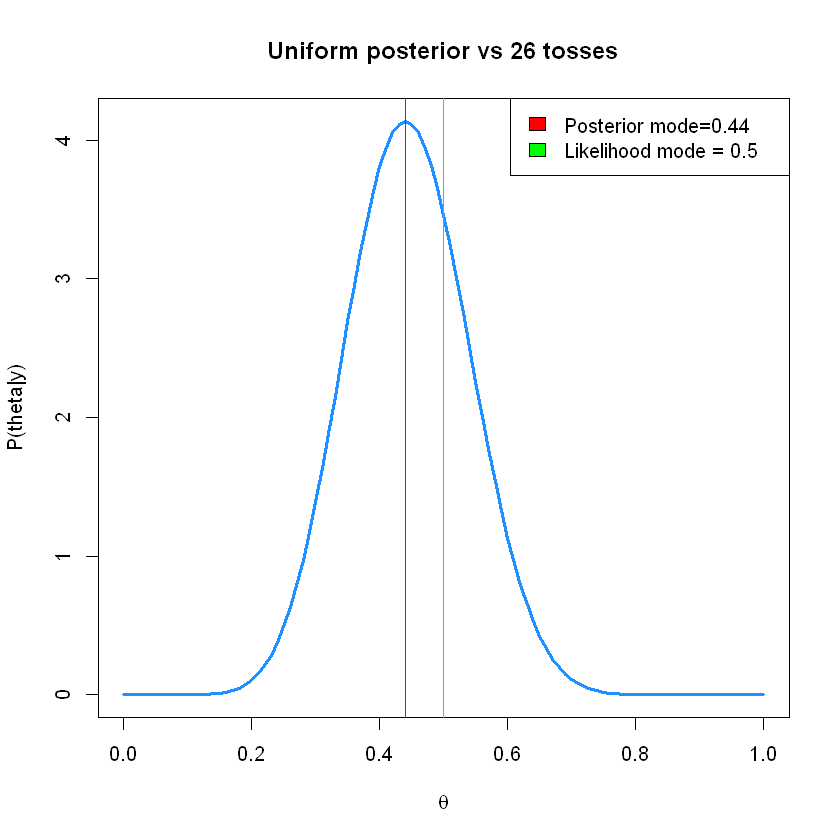

In [117]:
# rappresentiamo per uniform prior l'evoluzione del posterior al variare del numero di estrazioni 
map <- function(theta,posterior) {
    if(length(theta[posterior==max(posterior)]) != 1) {
        return(NaN)
        }
    else(return(theta[posterior==max(posterior)]))
    }
# ricordiamo che la funzione map nel caso in cui, come nell'uniform posterior al primo step, ci dovessero essere più mode restituisce NaN

for(i in seq(1,length(coin.tosses), by=5)){
    y <- dbeta(theta,shape1 = alpha.list.uni[i], shape2 = beta.list.uni[i])
    plot(theta, y, type="l", lwd=3, col="dodgerblue", xlab=expression(theta),
        ylab="P(theta|y)",main=sprintf("Uniform posterior vs %i tosses",i))
    abline(v = map(theta,y), col = "red")
    abline(v = 0.5, col = "green")
    legend("topright", legend = c(sprintf("Posterior mode=%.2f",map(theta,y)), sprintf("Likelihood mode = 0.5")), col = c("red","green"),
           fill=c("red","green"))
}

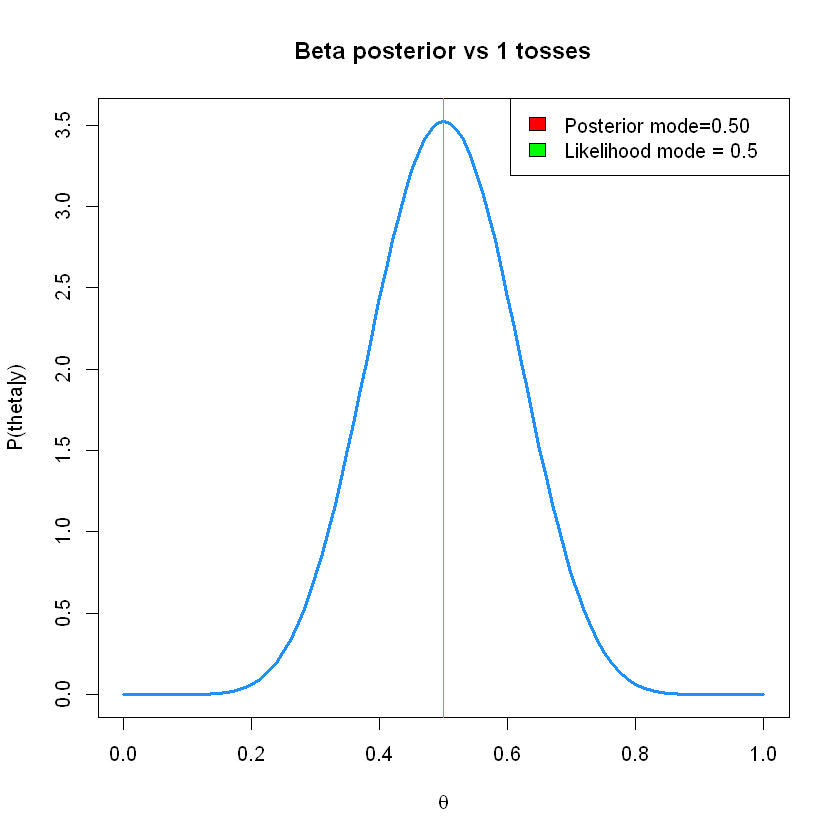

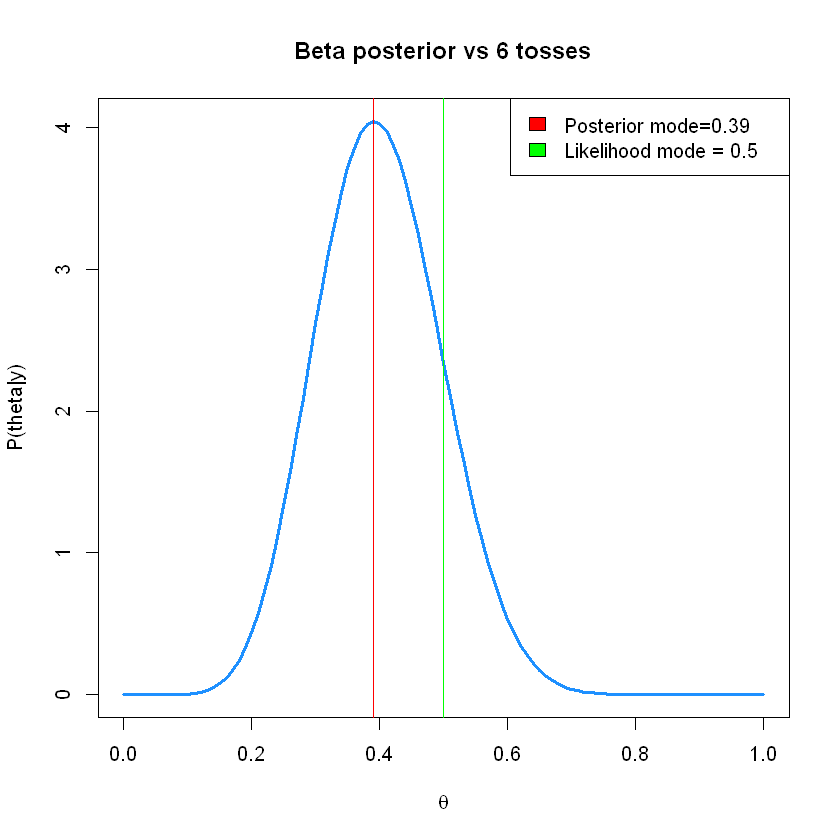

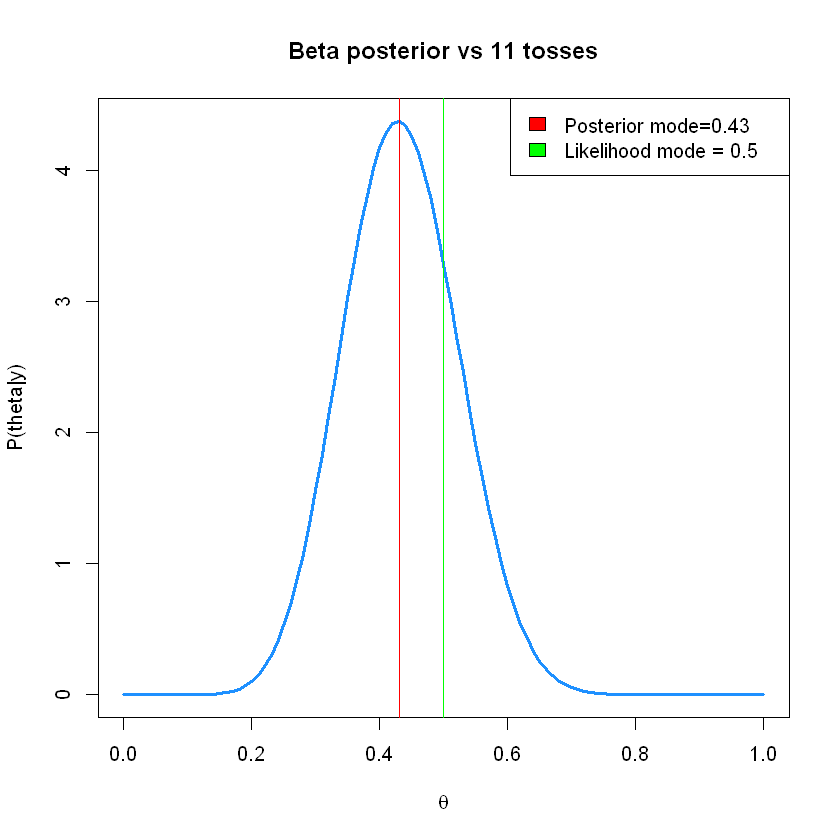

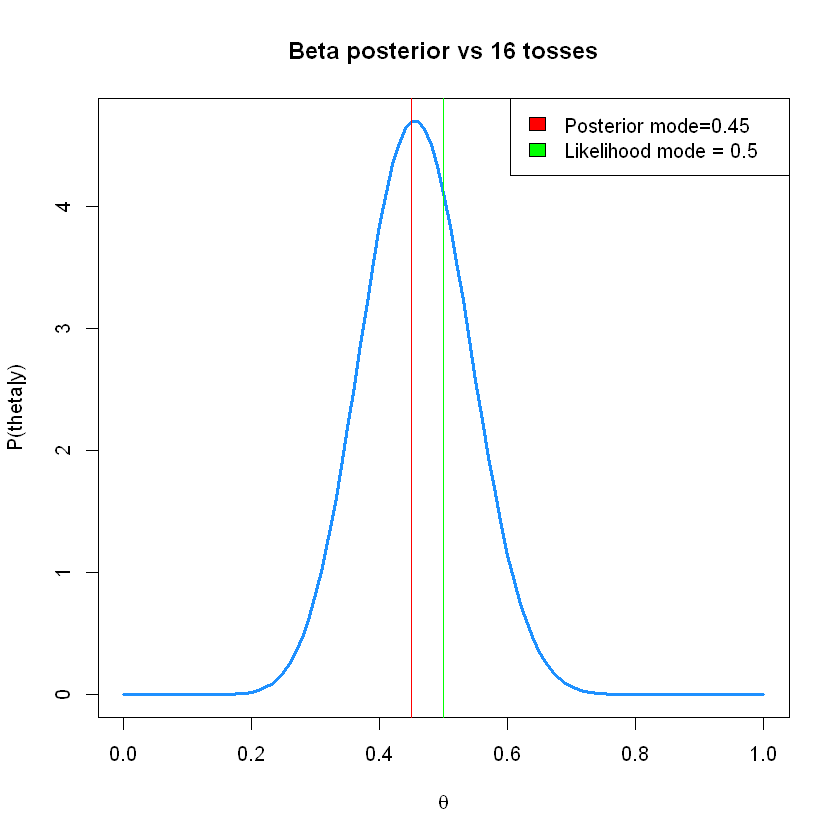

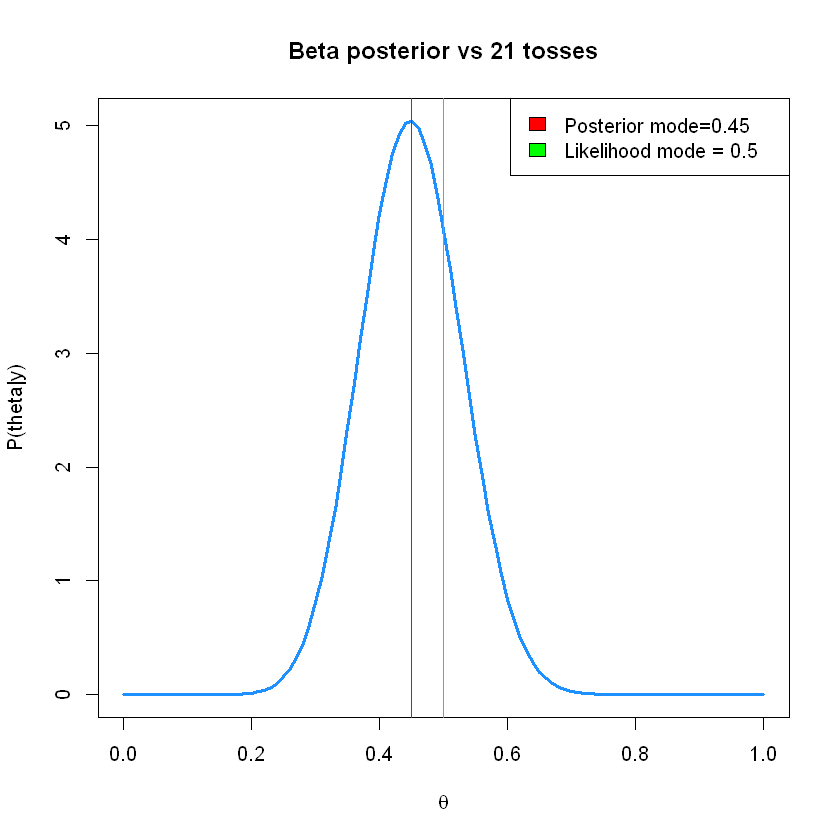

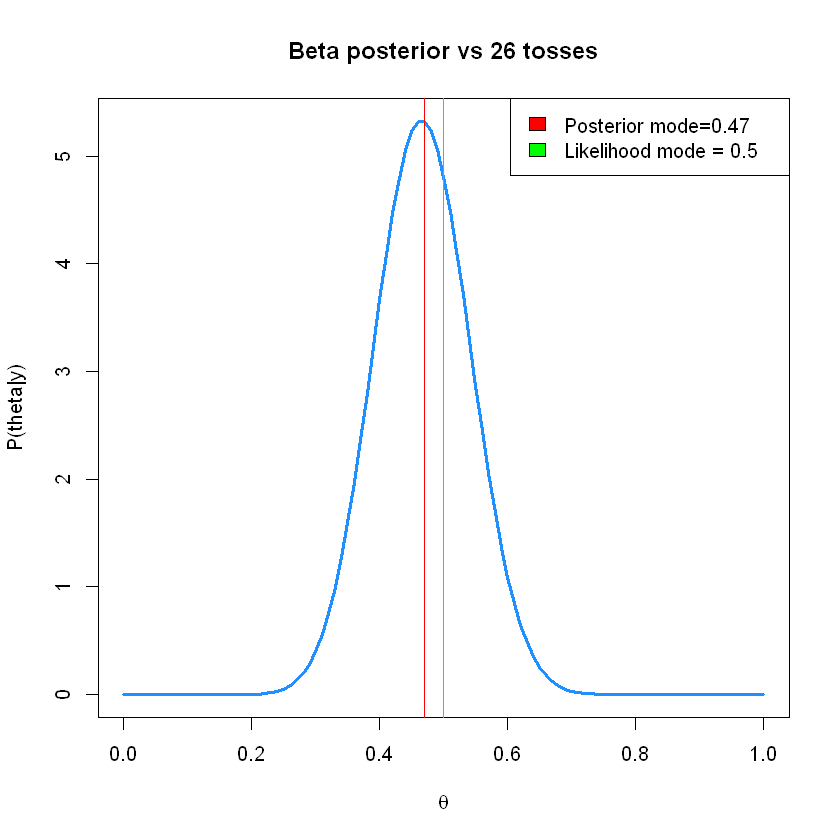

In [118]:
#stesso discorso per il beta prior 

for(i in seq(1,length(coin.tosses), by=5)){
    y <- dbeta(theta,shape1 = alpha.list.beta[i], shape2 = beta.list.beta[i])
    plot(theta, y, type="l", lwd=3, col="dodgerblue", xlab=expression(theta),
        ylab="P(theta|y)",main=sprintf("Beta posterior vs %i tosses",i))
    abline(v = map(theta,y), col = "red")
    abline(v = 0.5, col = "green")
    legend("topright", legend = c(sprintf("Posterior mode=%.2f",map(theta,y)), sprintf("Likelihood mode = 0.5")), col = c("red","green"),
           fill=c("red","green"))
}

### I risultati che abbiamo ottenuto tramite inferenza step by step sono gli stessi di quelli ricavati nella sezione precedente?

E' possibile dimostrare analiticamente che, nell'ipotesi in cui ciascuna estrazione sia indipendente dalla precedente, i posterior riguardanti due set di dati insieme oppure separati coincidono:

Se calcoliamo il posterior quando $D'$ e $D$ sono un unico set:

$$ P(\theta|D',D) = \frac{P(D',D|\theta)\cdot P(\theta)}{\sum_{\theta^*}P(D',D|\theta)\cdot P(\theta^*)} \ \ \ \text{Teorema di Bayes} \\ 
= \frac{P(D'|\theta)\cdot P(D|\theta) \cdot P(\theta)}{\sum_{\theta^*}P(D'|\theta^*)\cdot P(D|\theta^*)\cdot P(\theta^*)} \ \ \ \text{Eventi indipendenti} $$

Se invece prima ad esempio consideriamo $D'$ e successivamente $D$ il posterior del primo diventa il prior del secondo cioè:

$$ P(\theta|D') = \frac{P(D'|\theta) \cdot P(\theta)}{P(D')} \ \ \ \text{Primo posterior} \\ 
P(\theta|D',D) = \frac{P(D|\theta)\cdot P(\theta|D')}{P(D)} = \frac{P(D'|\theta)\cdot P(D|\theta) \cdot P(\theta)}{P(D') \cdot P(D)} $$

Da $P(D)\cdot P(D')=P(D,D')$ segue la tesi 

In [129]:
#per confrontare numericamente che effettivamente i due procedimenti coincidono scriviamo 

alpha.beta.total <- (alpha + n.heads)
beta.beta.total <- (beta + (n.attempts - n.heads))
alpha.uni.total <- (1 + n.heads)
beta.uni.total <- (1 + (n.attempts - n.heads))

print("Beta prior")
sprintf("Alpha calcolato in un passo = %i e step by step = %i",alpha.beta.total, alpha.list.beta[length(alpha.list.beta)])
sprintf("Beta calcolato in un passo = %i e step by step = %i",beta.beta.total, beta.list.beta[length(beta.list.beta)])

print("Uniform prior")
sprintf("Alpha calcolato in un passo = %i e step by step = %i",alpha.uni.total, alpha.list.uni[length(alpha.list.uni)])
sprintf("Beta calcolato in un passo = %i e step by step = %i",beta.uni.total, beta.list.uni[length(beta.list.beta)])

[1] "Beta prior"


[1] "Alpha calcolato in un passo = 25 e step by step = 25"

[1] "Beta calcolato in un passo = 25 e step by step = 25"

[1] "Uniform prior"


[1] "Alpha calcolato in un passo = 16 e step by step = 16"

[1] "Beta calcolato in un passo = 16 e step by step = 16"